In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df = df[['Age','Gender','Height','Weight','SMOKE','NObeyesdad']]

### Preprocessing

In [4]:
#Missing Values checking
df.isnull().sum()


Age           0
Gender        0
Height        0
Weight        0
SMOKE         0
NObeyesdad    0
dtype: int64

In [5]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['SMOKE'] = label_encoder.fit_transform(df['SMOKE'])
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])


### Visualization

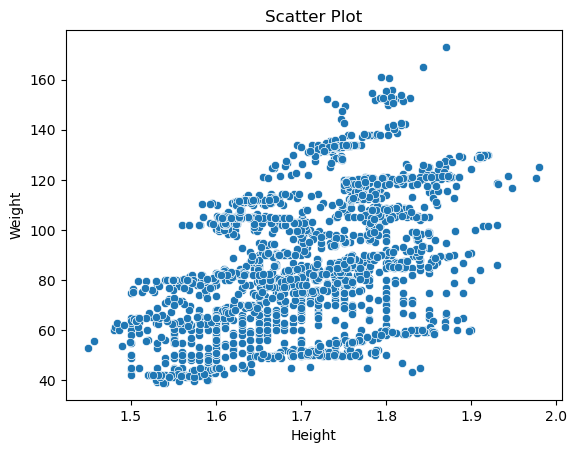

In [6]:
sns.scatterplot(x=df['Height'], y=df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter Plot')
plt.show()

<Axes: xlabel='Gender'>

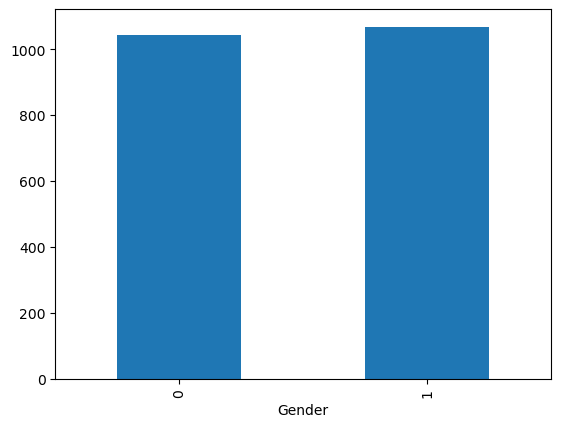

In [7]:
#plotting Gender 
Gender_count = df.groupby('Gender').count()

Gender_count.Age.plot(kind = 'bar')

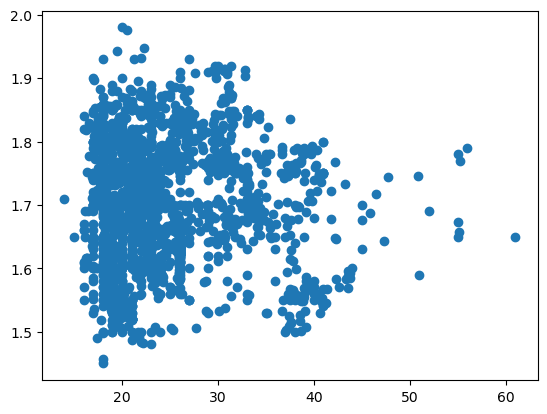

In [8]:
plt.scatter(df['Age'],df['Height'])

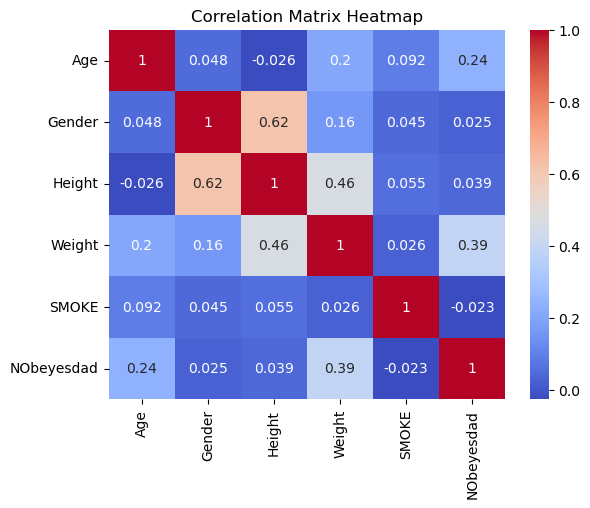

In [9]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
# Split the data into training and testing sets
X = df[['Age', 'Gender', 'Height', 'Weight', 'SMOKE']]
y = df['NObeyesdad']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Using the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9716312056737588


In [15]:
#Model Using Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Accuracy: 0.6761229314420804


C:\Users\Raja.Balasubramani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
#Model Using Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.9574468085106383


In [17]:
#Model Using SVM

svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.5484633569739953
